In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

In [4]:
df = pd.read_csv("../proc_data/ethylene_CO.csv")
df.head(5)

,Time,Conc_CO,Conc_Eth,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15
0,0.00,0.0,0.0,-50.85,-1.95,-41.82,1.30,-4.07,-28.73,-13.49,-3.25,55139.95,50669.50,9626.26,9762.62,24544.02,21420.68,7650.61,6928.42
1,0.01,0.0,0.0,-49.40,-5.53,-42.78,0.49,3.58,-34.55,-9.59,5.37,54395.77,50046.91,9433.20,9591.21,24137.13,20930.33,7498.79,6800.66
2,0.01,0.0,0.0,-40.04,-16.09,-27.59,0.00,-7.16,-42.14,-12.52,-5.86,53960.02,49299.30,9324.40,9449.81,23628.90,20504.94,7369.67,6697.47
3,0.03,0.0,0.0,-47.14,-10.57,-32.28,4.40,-11.22,-37.94,-7.16,-1.14,53047.71,48907.00,9170.64,9305.58,23101.66,20101.42,7285.13,6578.52
4,0.04,0.0,0.0,-33.58,-20.79,-33.25,6.03,3.42,-34.22,-14.46,8.31,52700.28,48330.96,9073.64,9163.47,22689.54,19694.07,7156.74,6468.32


In [5]:
print(df.shape)

(4208261, 19)


In [20]:
feature_cols = df.columns.tolist()
feature_cols.remove("Conc_CO")
feature_cols.remove("Conc_Eth")
feature_cols.remove("Time")

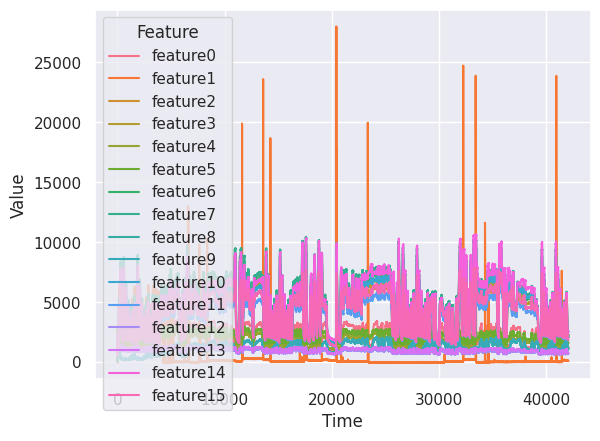

In [17]:
sample_df = df.sample(frac=0.01)
melted_df = pd.melt(sample_df[feature_cols + ['Time']], id_vars=['Time'], value_vars=feature_cols,
                     var_name='Features', value_name='Values')
sns.lineplot(x='Time', y='Values', hue='Features', data=melted_df)
plt.show()


### Normalisation

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])

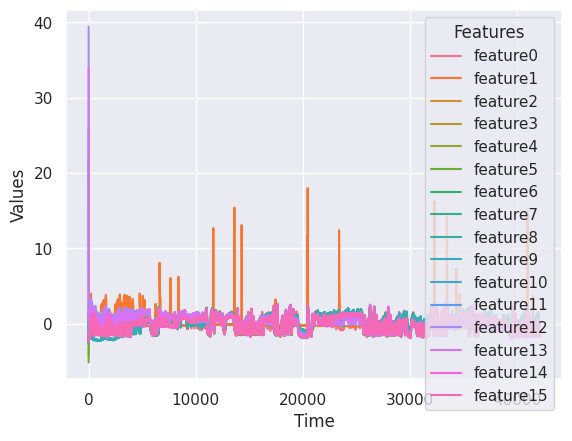

In [22]:
sample_df = df.sample(frac=0.01)
melted_df = pd.melt(sample_df[feature_cols + ['Time']], id_vars=['Time'], value_vars=feature_cols,
                     var_name='Features', value_name='Values')
sns.lineplot(x='Time', y='Values', hue='Features', data=melted_df)
plt.show()


[1.12240196e+01 1.99090651e+00 1.83791567e+00 5.56143966e-01
 3.06078904e-01 4.61486751e-02 1.52273248e-02 1.01586518e-02
 6.11067902e-03 3.80542659e-03 1.68731714e-03 1.00761915e-03
 3.34733274e-04 2.49791583e-04 1.21421253e-04 8.75095462e-05]


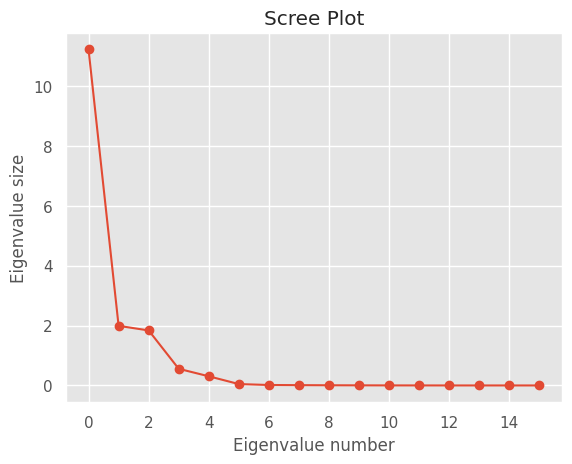

In [24]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=16)
pca.fit(df[feature_cols])
plt.style.use("ggplot") 
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")
print(pca.explained_variance_)

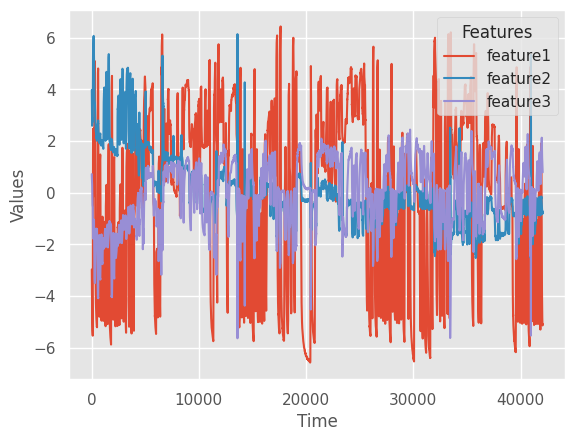

In [26]:
pca = PCA(n_components=3)
pca.fit(df[feature_cols])
new_feature_cols = ['feature1','feature2','feature3']
proc_df = pd.DataFrame(data=pca.transform(df[feature_cols]),columns=new_feature_cols)
proc_df['Time'] = df['Time']
proc_df['Conc_CO'] = df['Conc_CO']
proc_df['Conc_Eth'] = df['Conc_Eth']
sample_df = proc_df.sample(frac=0.001)
melted_df = pd.melt(sample_df[new_feature_cols + ['Time']], id_vars=['Time'], value_vars=new_feature_cols,
                     var_name='Features', value_name='Values')
sns.lineplot(x='Time', y='Values', hue='Features', data=melted_df)
plt.show()

In [27]:
proc_df.to_csv("../proc_data/ethylene_CO_reduced.csv")